## Kmeans Clustering Random Data
k-means clustering algorithm is an unsupervised clustering method that aims to partition n observations into k clusters. Then, each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In [19]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([ [1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0] ])

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

print('labels:', kmeans.labels_)
print('prediction:', kmeans.predict([ [0, 0], [12, 3] ]))
print('kmeans.cluster_centers_:', kmeans.cluster_centers_)

labels: [1 1 1 0 0 0]
prediction: [1 0]
kmeans.cluster_centers_: [[10.  2.]
 [ 1.  2.]]


[ True False  True ... False False False]
[False  True False ...  True  True False]
[False False False ... False False  True]


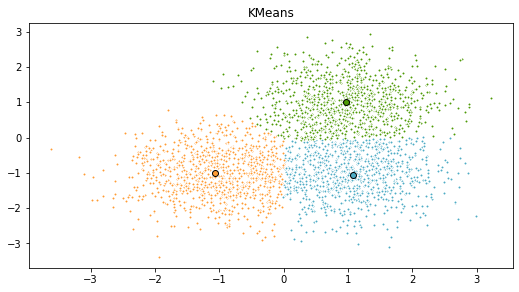

In [43]:
import time
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

# #############################################################################
#### Generate sample data ####

centers    = [ [1, 1], [-1, -1], [1, -1] ]
n_clusters = len(centers)

X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

# #############################################################################
# Compute clustering with Means

k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(X)

t0 = time.time()

k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

#################### Ploting ####################

fig = plt.figure(figsize=(7, 4))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)

colors = ['#4EACC5', '#FF9C34', '#4E9A06']
ax = fig.add_subplot(1, 1, 1)
ax.set_title('KMeans')

for k, col in zip(range(n_clusters), colors):
    my_members     = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0],  X[my_members, 1],  'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    

